<a href="https://colab.research.google.com/github/JNeerajsai/Major/blob/main/Mini2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Define number of samples
n_samples = 1000

# Generate synthetic data
np.random.seed(42)
data = {
    'pre_meal_glucose': np.random.randint(80, 130, n_samples),  # Pre-meal glucose level
    'post_meal_glucose': np.random.randint(90, 250, n_samples),  # Post-meal glucose level
    'meal_carbohydrate': np.random.randint(20, 100, n_samples),  # Carbohydrates in meal (g)
    'insulin_dose': np.random.uniform(0, 10, n_samples),         # Insulin dose (units)
    'exercise_duration': np.random.randint(0, 60, n_samples),    # Exercise duration (minutes)
    'age': np.random.randint(25, 70, n_samples),                 # Age
    'BMI': np.random.uniform(18, 35, n_samples)                  # Body Mass Index
}

# Create a target column for hypo (0), normal (1), hyper (2) based on post-meal glucose
def glucose_level_class(post_meal_glucose):
    if post_meal_glucose < 70:
        return 0  # Hypoglycemia
    elif post_meal_glucose <= 180:
        return 1  # Normal
    else:
        return 2  # Hyperglycemia

data['glucose_level'] = [glucose_level_class(x) for x in data['post_meal_glucose']]

# Convert to DataFrame
df = pd.DataFrame(data)
df.to_csv('synthetic_diabetes_data.csv', index=False)
print("Synthetic dataset saved as 'synthetic_diabetes_data.csv'")


Synthetic dataset saved as 'synthetic_diabetes_data.csv'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/synthetic_diabetes_data.csv')

# Encode target labels (e.g., 0 = normal, 1 = hypoglycemia, 2 = hyperglycemia)
label_encoder = LabelEncoder()
data['glucose_level'] = label_encoder.fit_transform(data['glucose_level'])

# Split features and target
X = data.drop(columns=['glucose_level'])
y = data['glucose_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize XGBoost model with training/validation monitoring and the correct objective function
xgb_model = XGBClassifier(
    objective='multi:softmax',  # Use 'multi:softmax' for multi-class classification
    num_class=3,                # Set the number of classes to 3 (0, 1, 2)
    eval_metric='mlogloss',    # Use mlogloss for multi-class classification
    use_label_encoder=False     # Already using encoded labels
)

# Train the model, monitoring the training and validation loss
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=True)


[0]	validation_0-mlogloss:0.70401	validation_1-mlogloss:0.70400
[1]	validation_0-mlogloss:0.48172	validation_1-mlogloss:0.48171
[2]	validation_0-mlogloss:0.33949	validation_1-mlogloss:0.33948
[3]	validation_0-mlogloss:0.24337	validation_1-mlogloss:0.24336
[4]	validation_0-mlogloss:0.17640	validation_1-mlogloss:0.17640
[5]	validation_0-mlogloss:0.12885	validation_1-mlogloss:0.12885
[6]	validation_0-mlogloss:0.09467	validation_1-mlogloss:0.09466
[7]	validation_0-mlogloss:0.06988	validation_1-mlogloss:0.06987
[8]	validation_0-mlogloss:0.05179	validation_1-mlogloss:0.05179
[9]	validation_0-mlogloss:0.03854	validation_1-mlogloss:0.03854
[10]	validation_0-mlogloss:0.02880	validation_1-mlogloss:0.02879
[11]	validation_0-mlogloss:0.02162	validation_1-mlogloss:0.02161
[12]	validation_0-mlogloss:0.01632	validation_1-mlogloss:0.01631
[13]	validation_0-mlogloss:0.01239	validation_1-mlogloss:0.01239
[14]	validation_0-mlogloss:0.00949	validation_1-mlogloss:0.00948
[15]	validation_0-mlogloss:0.00733	

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:42:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[23]	validation_0-mlogloss:0.00154	validation_1-mlogloss:0.00155
[24]	validation_0-mlogloss:0.00147	validation_1-mlogloss:0.00148
[25]	validation_0-mlogloss:0.00146	validation_1-mlogloss:0.00146
[26]	validation_0-mlogloss:0.00144	validation_1-mlogloss:0.00145
[27]	validation_0-mlogloss:0.00143	validation_1-mlogloss:0.00143
[28]	validation_0-mlogloss:0.00142	validation_1-mlogloss:0.00142
[29]	validation_0-mlogloss:0.00140	validation_1-mlogloss:0.00141
[30]	validation_0-mlogloss:0.00139	validation_1-mlogloss:0.00139
[31]	validation_0-mlogloss:0.00138	validation_1-mlogloss:0.00138
[32]	validation_0-mlogloss:0.00137	validation_1-mlogloss:0.00137
[33]	validation_0-mlogloss:0.00136	validation_1-mlogloss:0.00136
[34]	validation_0-mlogloss:0.00135	validation_1-mlogloss:0.00135
[35]	validation_0-mlogloss:0.00134	validation_1-mlogloss:0.00134
[36]	validation_0-mlogloss:0.00133	validation_1-mlogloss:0.00133
[37]	validation_0-mlogloss:0.00132	validation_1-mlogloss:0.00132
[38]	validation_0-mloglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

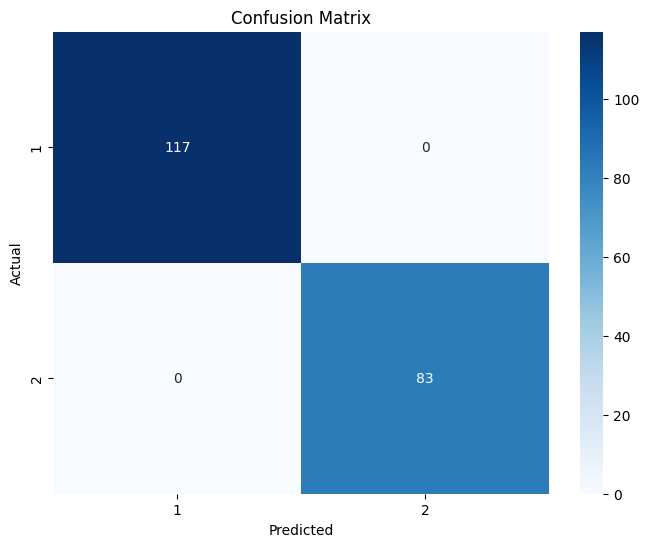

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        83

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
y_pred = xgb_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
target_names = [str(label) for label in label_encoder.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))



In [ ]:
import pandas as pd
import numpy as np

# Define number of samples
n_samples = 1000

# Generate synthetic data
np.random.seed(42)
data = {
    'pre_meal_glucose': np.random.randint(80, 130, n_samples),  # Pre-meal glucose level
    'post_meal_glucose': np.random.randint(90, 250, n_samples),  # Post-meal glucose level
    'meal_carbohydrate': np.random.randint(20, 100, n_samples),  # Carbohydrates in meal (g)
    'insulin_dose': np.random.uniform(0, 10, n_samples),         # Insulin dose (units)
    'exercise_duration': np.random.randint(0, 60, n_samples),    # Exercise duration (minutes)
    'age': np.random.randint(25, 70, n_samples),                 # Age
    'BMI': np.random.uniform(18, 35, n_samples)                  # Body Mass Index
}

def glucose_level_class(post_meal_glucose):
    if post_meal_glucose < 70:
        return 0  # Hypoglycemia
    elif post_meal_glucose <= 180:
        return 1  # Normal
    else:
        return 2  # Hyperglycemia

data['glucose_level'] = [glucose_level_class(x) for x in data['post_meal_glucose']]

df = pd.DataFrame(data)
df.to_csv('synthetic_diabetes_data.csv', index=False)
print("Synthetic dataset saved as 'synthetic_diabetes_data.csv'")
print(df)


Synthetic dataset saved as 'synthetic_diabetes_data.csv'
     pre_meal_glucose  post_meal_glucose  meal_carbohydrate  insulin_dose  \
0                 118                210                 36      1.149330   
1                 108                122                 45      0.938573   
2                  94                239                 27      9.096268   
3                 122                110                 66      6.692003   
4                  87                159                 95      8.292868   
..                ...                ...                ...           ...   
995               105                175                 88      7.021461   
996               113                123                 67      1.716939   
997               124                144                 39      5.001128   
998                85                208                 86      4.119581   
999               116                247                 63      8.705270   

     exercise_dura

In [ ]:
print(df)

     pre_meal_glucose  post_meal_glucose  meal_carbohydrate  insulin_dose  \
0                 118                210                 36      1.149330   
1                 108                122                 45      0.938573   
2                  94                239                 27      9.096268   
3                 122                110                 66      6.692003   
4                  87                159                 95      8.292868   
..                ...                ...                ...           ...   
995               105                175                 88      7.021461   
996               113                123                 67      1.716939   
997               124                144                 39      5.001128   
998                85                208                 86      4.119581   
999               116                247                 63      8.705270   

     exercise_duration  age        BMI  glucose_level  
0                  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/synthetic_diabetes_data.csv')

In [ ]:
df.head()

pre_meal_glucose  post_meal_glucose  meal_carbohydrate  insulin_dose  \
0               118                210                 36      1.149330   
1               108                122                 45      0.938573   
2                94                239                 27      9.096268   
3               122                110                 66      6.692003   
4                87                159                 95      8.292868   

   exercise_duration  age        BMI  glucose_level  
0                 33   26  26.733034              2  
1                 28   25  22.899137              1  
2                 47   64  18.109894              2  
3                 46   54  26.436067              1  
4                 12   35  22.855642              1

from matplotlib import pyplot as plt
_df_0['pre_meal_glucose'].plot(kind='hist', bins=20, title='pre_meal_glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['post_meal_glucose'].plot(kind='hist', bins=20, title='post_meal_glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['meal_carbohydrate'].plot(kind='hist', bins=20, title='meal_carbohydrate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['insulin_dose'].plot(kind='hist', bins=20, title='insulin_dose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='pre_meal_glucose', y='post_meal_glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='post_meal_glucose', y='meal_carbohydrate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='meal_carbohydrate', y='insulin_dose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='insulin_dose', y='exercise_duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['pre_meal_glucose'].plot(kind='line', figsize=(8, 4), title='pre_meal_glucose')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['post_meal_glucose'].plot(kind='line', figsize=(8, 4), title='post_meal_glucose')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['meal_carbohydrate'].plot(kind='line', figsize=(8, 4), title='meal_carbohydrate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['insulin_dose'].plot(kind='line', figsize=(8, 4), title='insulin_dose')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pre_meal_glucose   1000 non-null   int64  
 1   post_meal_glucose  1000 non-null   int64  
 2   meal_carbohydrate  1000 non-null   int64  
 3   insulin_dose       1000 non-null   float64
 4   exercise_duration  1000 non-null   int64  
 5   age                1000 non-null   int64  
 6   BMI                1000 non-null   float64
 7   glucose_level      1000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.describe()

pre_meal_glucose  post_meal_glucose  meal_carbohydrate  insulin_dose  \
count       1000.000000        1000.000000        1000.000000   1000.000000   
mean         104.830000         167.844000          57.896000      4.937656   
std           14.346809          47.066814          23.061722      2.879100   
min           80.000000          90.000000          20.000000      0.000116   
25%           93.000000         127.000000          38.000000      2.591791   
50%          105.000000         167.000000          56.000000      4.917106   
75%          116.000000         209.000000          79.000000      7.368688   
max          129.000000         249.000000          99.000000      9.978209   

       exercise_duration          age          BMI  glucose_level  
count        1000.000000  1000.000000  1000.000000    1000.000000  
mean           30.309000    47.313000    26.475884       1.424000  
std            17.297882    12.952946     4.887515       0.494438  
min             0.000000    25.000000    18.003860       1.000000  
25%            15.000000    37.000000    22.361066       1.000000  
50%            30.000000    47.000000    26.222546       1.000000  
75%            46.000000    58.000000    30.753650       2.000000  
max            59.000000    69.000000    34.979480       2.000000

In [ ]:
print(df.dtypes.unique())

In [ ]:
100*(df.isnull().sum())/(df.shape[0])

pre_meal_glucose     0.0
post_meal_glucose    0.0
meal_carbohydrate    0.0
insulin_dose         0.0
exercise_duration    0.0
age                  0.0
BMI                  0.0
glucose_level        0.0
dtype: float64

In [ ]:
df['glucose_level'].value_counts()

glucose_level
1    576
2    424
Name: count, dtype: int64

In [ ]:
def glucose_level_class(post_meal_glucose):
    if post_meal_glucose < 70:
        return 0  # Hypoglycemia
    elif post_meal_glucose <= 180:
        return 1  # Normal
    else:
        return 2  # Hyperglycemia

data['glucose_level'] = [glucose_level_class(x) for x in data['post_meal_glucose']]


{'pre_meal_glucose': array([118, 108,  94, 122,  87, 100, 118,  98, 102,  90,  90, 103, 115,
       119, 103,  82, 101,  81, 103, 123, 109, 117,  81, 100, 112,  91,
       101, 123, 104, 128, 106, 121, 107,  95,  94, 126, 123,  82, 116,
        86, 100,  88, 118,  97,  83, 104,  93, 129,  88, 105,  81,  99,
       107, 126,  86, 123,  87, 126, 114,  93,  96, 115, 129, 119,  83,
        81,  85, 121,  83, 108,  97, 105, 123, 113,  89, 115,  93, 110,
       127,  94,  87,  93, 102, 119, 100,  95, 124,  97, 126, 103, 105,
       104, 124, 120, 108,  94, 124,  80, 104,  86,  88, 103,  80, 123,
        87, 103,  90,  96,  87, 114, 114, 112,  84, 121, 118, 120, 107,
        86,  88,  87,  91, 113, 112, 127, 102, 103, 116, 114, 123, 119,
       101, 106, 114,  80, 114, 116, 126,  93,  82,  80,  84, 105,  93,
       118, 106,  88,  94,  94, 105, 121,  92, 111, 118, 128, 111,  83,
       109, 116, 102, 118, 124,  94, 122, 108, 115,  92, 111,  86, 101,
       107,  81, 121, 124,  85, 107, 107, 1

In [ ]:
df['glucose_level']=df['glucose_level'].apply(lambda x: 'Diabetic' if x==1 else 'Nondiabetic')

In [ ]:
df.head(2)

pre_meal_glucose  post_meal_glucose  meal_carbohydrate  insulin_dose  \
0               118                210                 36      1.149330   
1               108                122                 45      0.938573   

   exercise_duration  age        BMI glucose_level  
0                 33   26  26.733034   Nondiabetic  
1                 28   25  22.899137   Nondiabetic

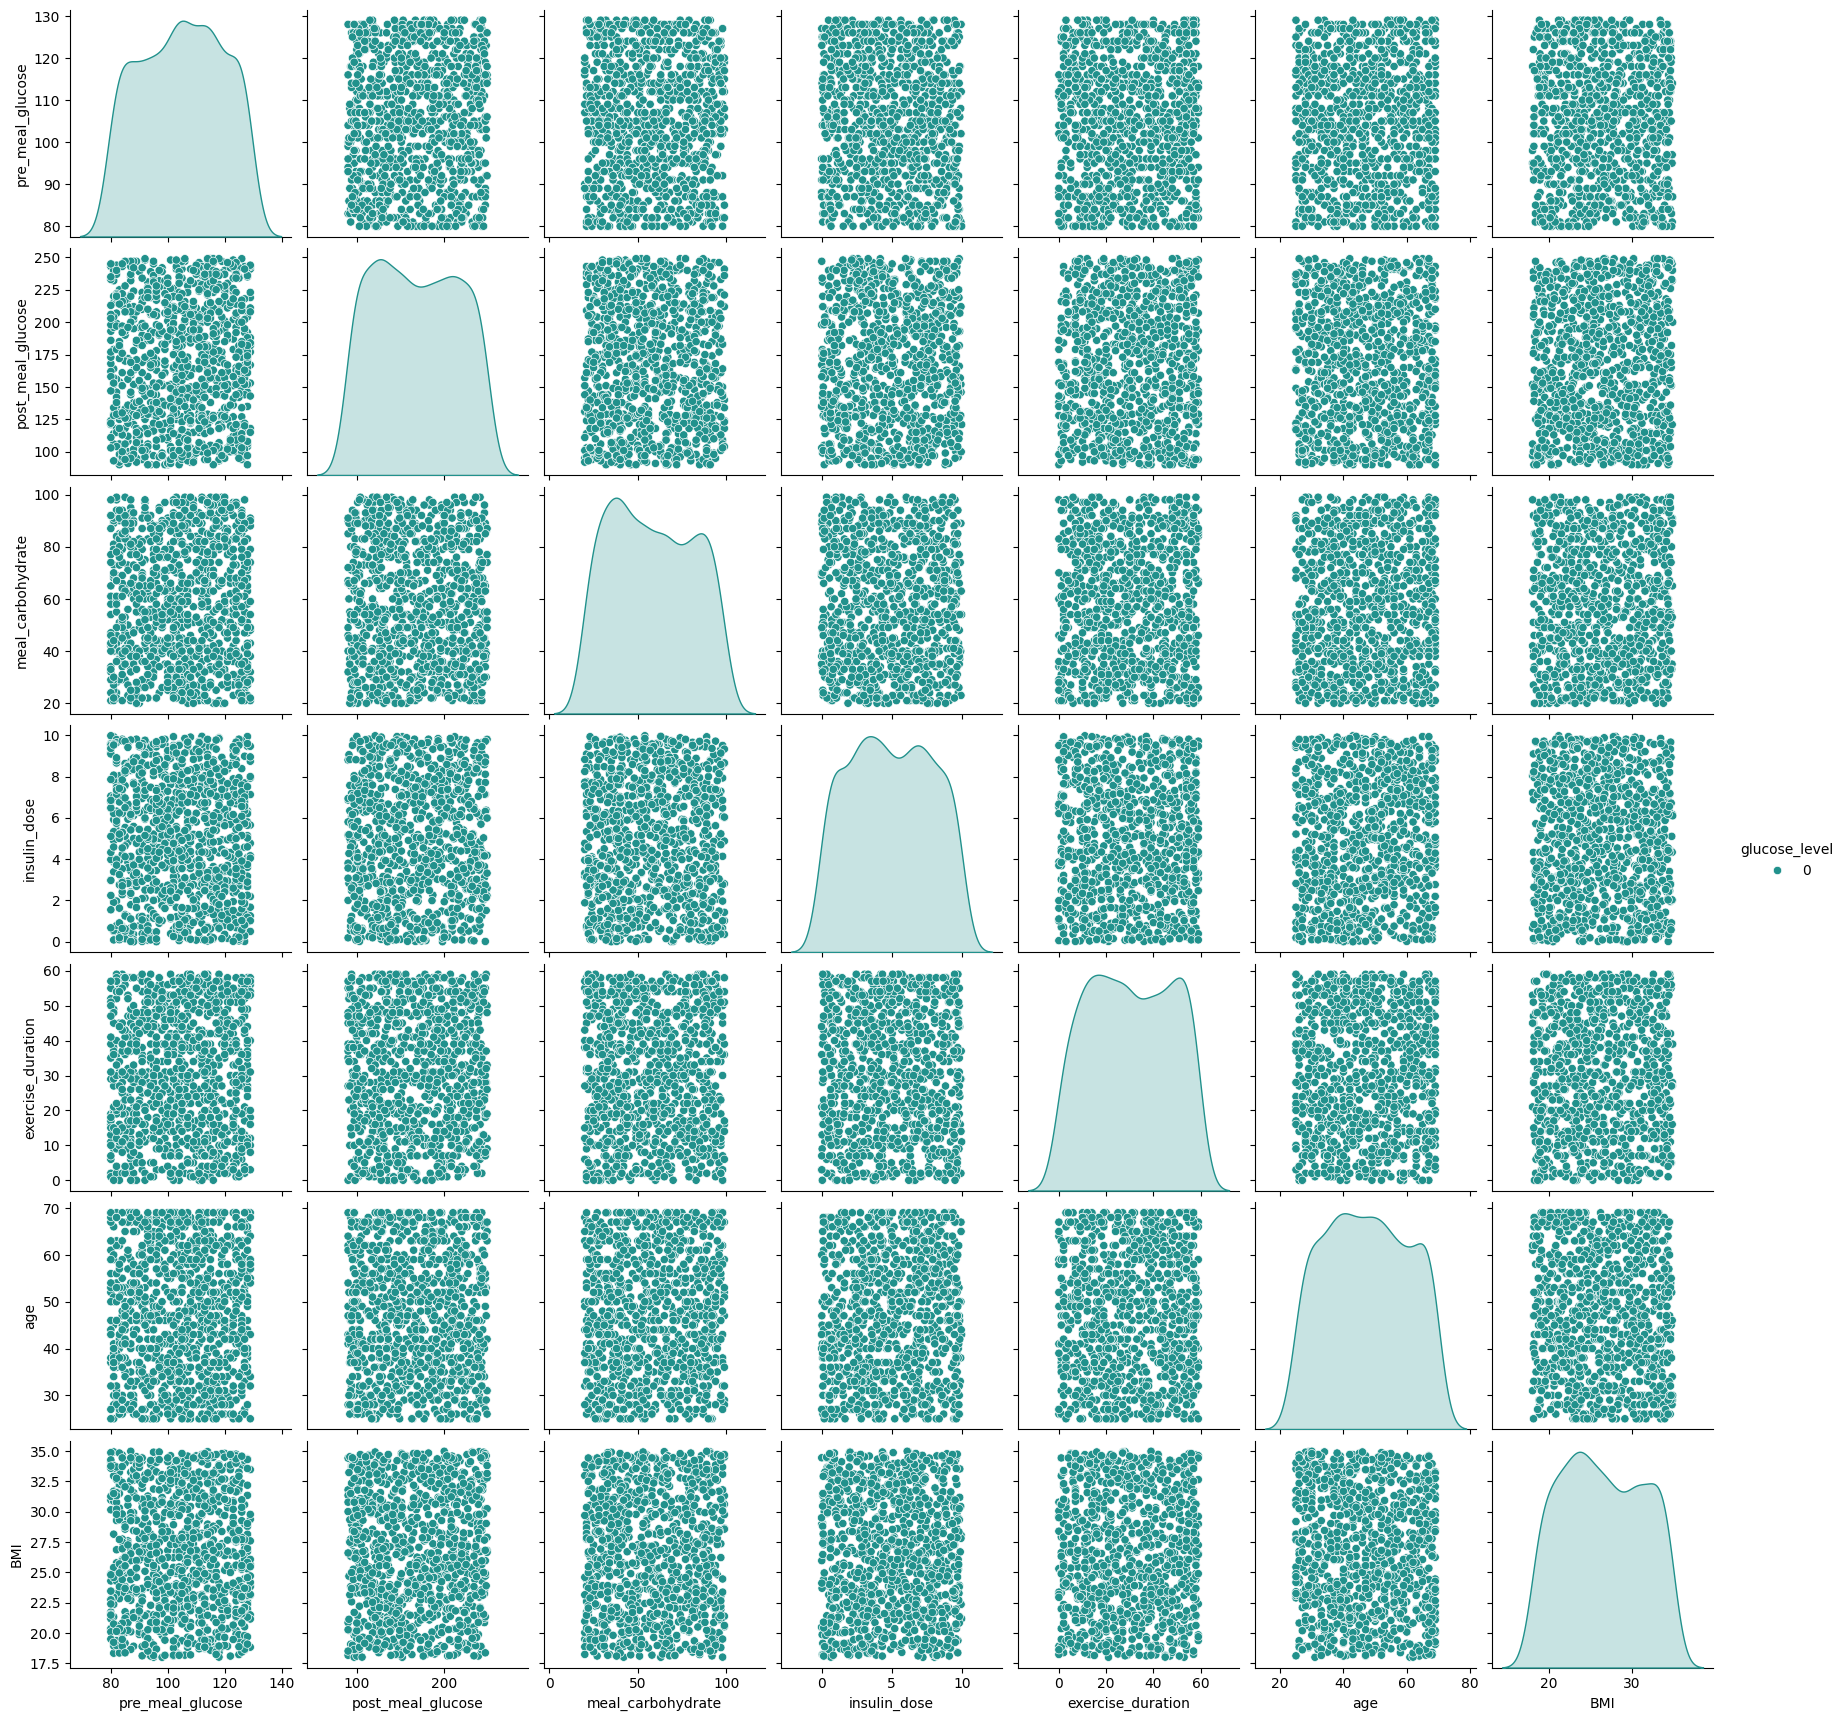

In [ ]:
sns.pairplot(df,hue='glucose_level',palette='viridis')
plt.show()

<ipython-input-51-ebd5ef2742e9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pre_meal_glucose'], color='green')
<ipython-input-51-ebd5ef2742e9>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['post_meal_glucose'], color='blue')
<ipython-input-51-ebd5ef2742e9>:12: UserWarning: 

`dist

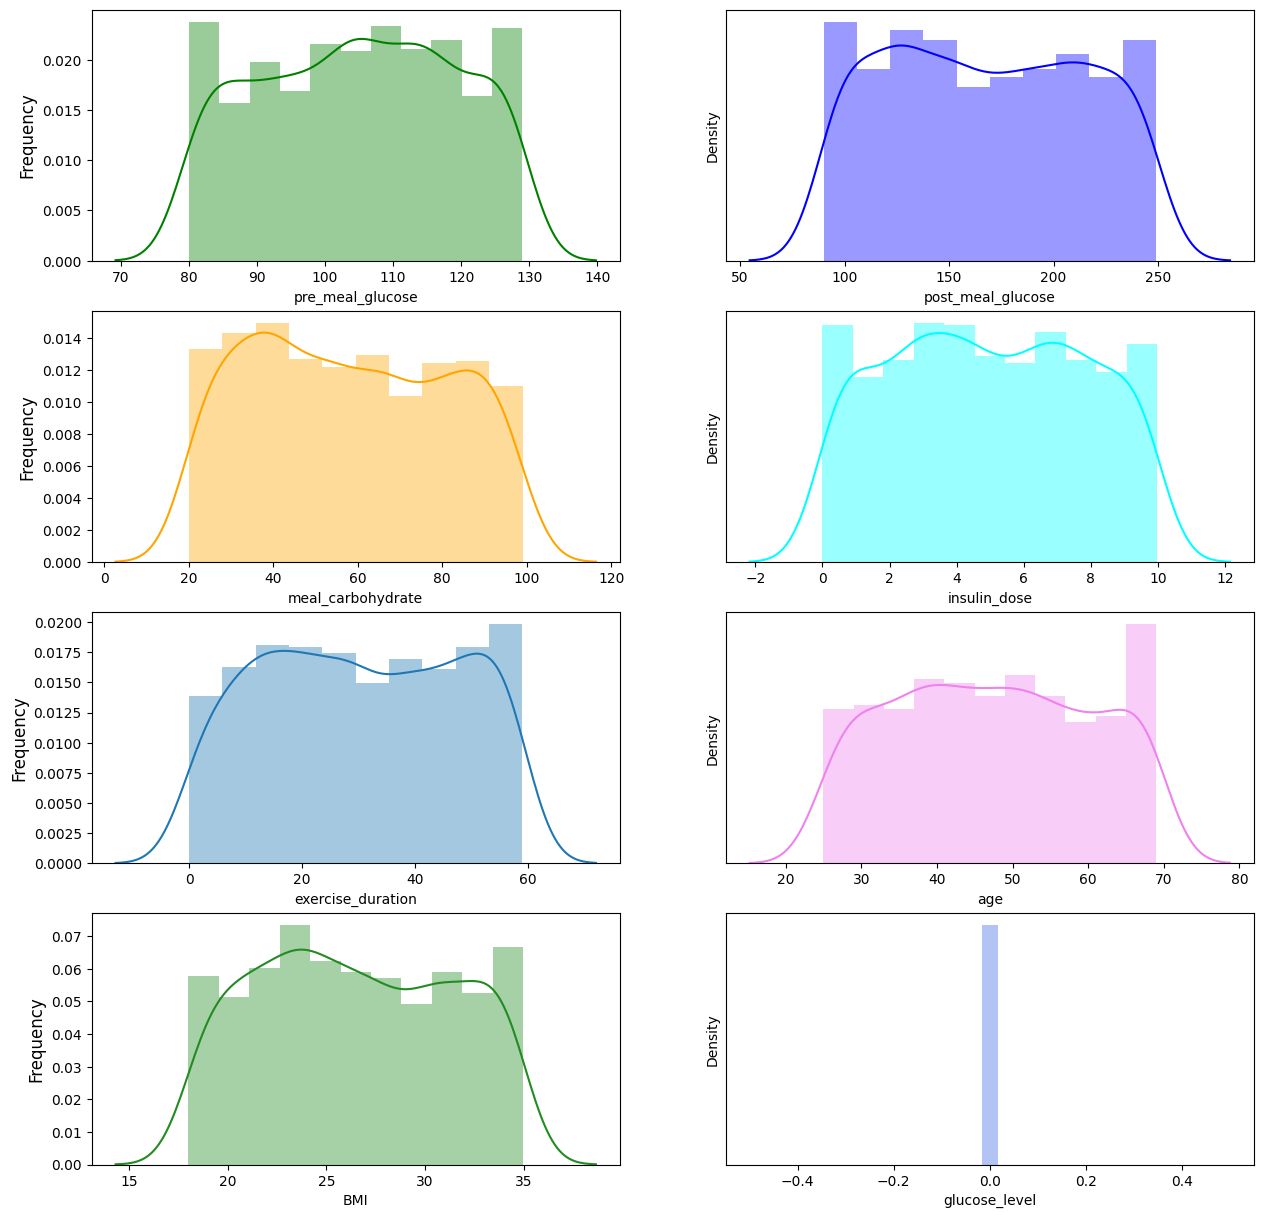

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.distplot(df['pre_meal_glucose'], color='green')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,2)
sns.distplot(df['post_meal_glucose'], color='blue')
plt.yticks([])

plt.subplot(4,2,3)
sns.distplot(df['meal_carbohydrate'], color='orange')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,4)
sns.distplot(df['insulin_dose'], color='cyan')
plt.yticks([])

plt.subplot(4,2,5)
sns.distplot(df['exercise_duration'])
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,6)
sns.distplot(df['age'], color='violet')
plt.yticks([])

plt.subplot(4,2,7)
sns.distplot(df['BMI'], color='forestgreen')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,8)
sns.distplot(df['glucose_level'], color='royalblue')
plt.yticks([])
plt.show()

In [ ]:
X=df.drop(['glucose_level'], axis=1)
y=df['glucose_level']

In [ ]:
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
xgbc = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)

In [ ]:
# Convert the target variable to numerical type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Now you can fit the model
xgbc.fit(X_trian, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
prediction_xgbc=xgbc.predict(X_test)

**XGBOOST**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/synthetic_diabetes_data.csv')
print(df.head())

   pre_meal_glucose  post_meal_glucose  meal_carbohydrate  insulin_dose  \
0               118                210                 36      1.149330   
1               108                122                 45      0.938573   
2                94                239                 27      9.096268   
3               122                110                 66      6.692003   
4                87                159                 95      8.292868   

   exercise_duration  age        BMI  glucose_level  
0                 33   26  26.733034              2  
1                 28   25  22.899137              1  
2                 47   64  18.109894              2  
3                 46   54  26.436067              1  
4                 12   35  22.855642              1  


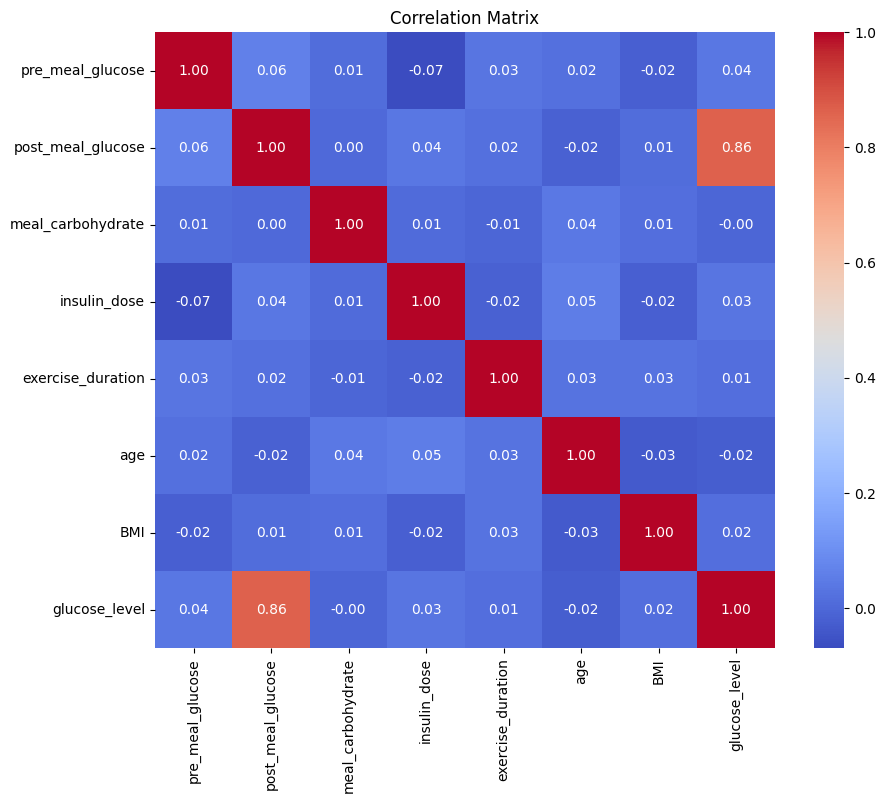

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = df.drop(columns=['glucose_level'])  # Features
y = df['glucose_level']  # Target variable


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes for glucose levels
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Add early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4300 - loss: 1.0703 - val_accuracy: 0.7250 - val_loss: 0.8143
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8357 - loss: 0.7368 - val_accuracy: 0.8750 - val_loss: 0.5578
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9170 - loss: 0.5034 - val_accuracy: 0.9375 - val_loss: 0.3639
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9565 - loss: 0.3248 - val_accuracy: 0.9563 - val_loss: 0.2434
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9603 - loss: 0.2103 - val_accuracy: 0.9563 - val_loss: 0.1728
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9567 - loss: 0.1691 - val_accuracy: 0.9625 - val_loss: 0.1352
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9647 - loss: 0.1276 - val_accuracy: 0.9563 - val_loss: 0.1139
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9720 - loss: 0.1055 - val_accuracy: 0.9750 - 

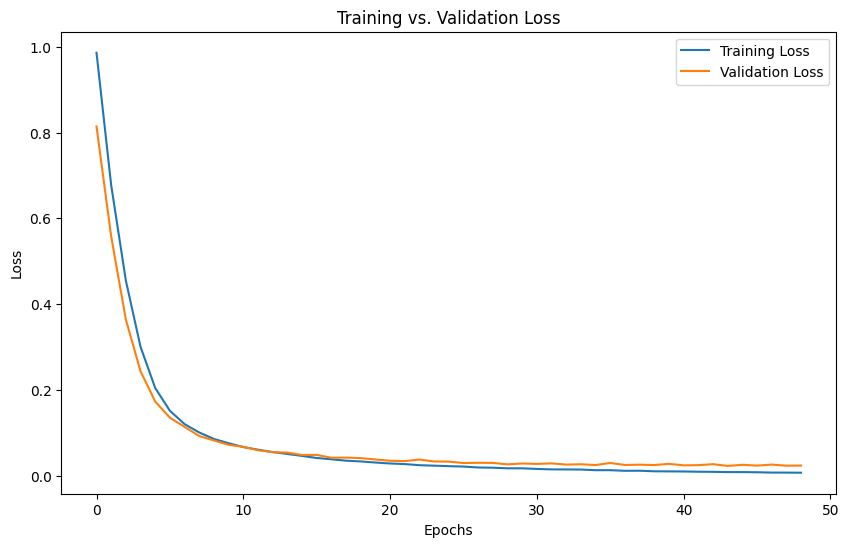

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


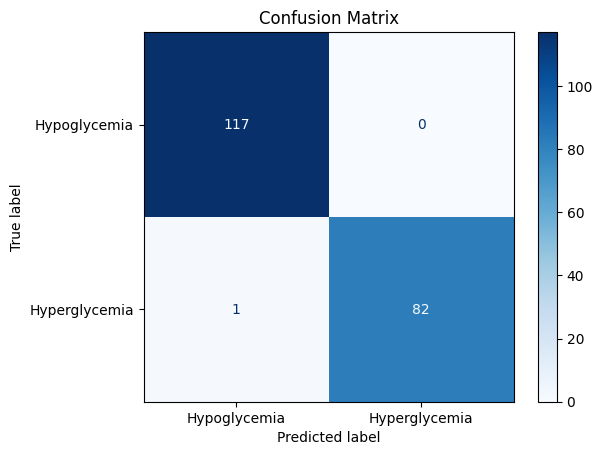

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Hypoglycemia', 'Hyperglycemia']).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Hypoglycemia', 'Hyperglycemia']))


Classification Report:
                precision    recall  f1-score   support

 Hypoglycemia       0.99      1.00      1.00       117
Hyperglycemia       1.00      0.99      0.99        83

     accuracy                           0.99       200
    macro avg       1.00      0.99      0.99       200
 weighted avg       1.00      0.99      0.99       200



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


<ipython-input-84-8fb426fd8cba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="glucose_level", y="pre_meal_glucose", palette="Set2")


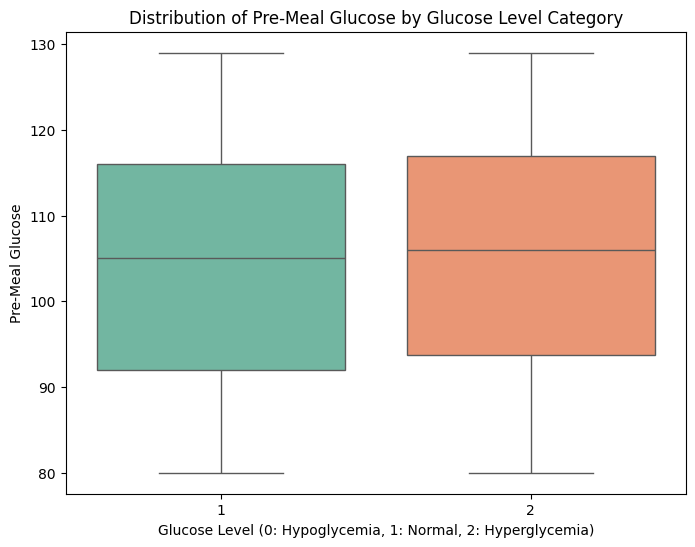

<ipython-input-84-8fb426fd8cba>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="glucose_level", y="post_meal_glucose", palette="Set1")


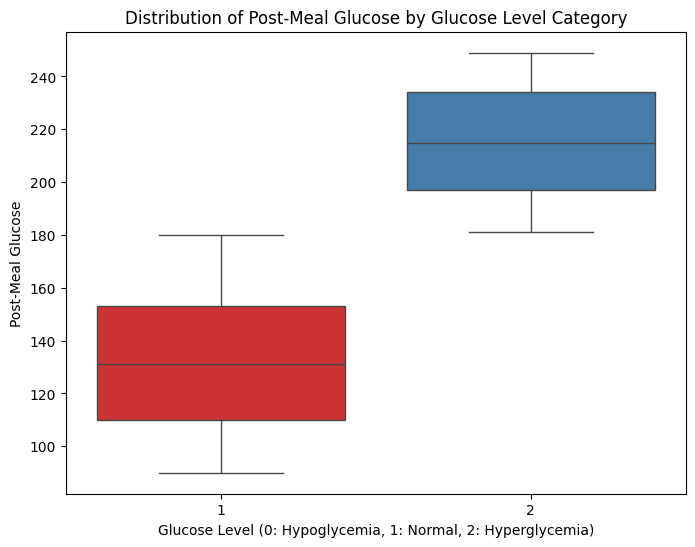

<ipython-input-84-8fb426fd8cba>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="glucose_level", y="insulin_dose", palette="Set3")


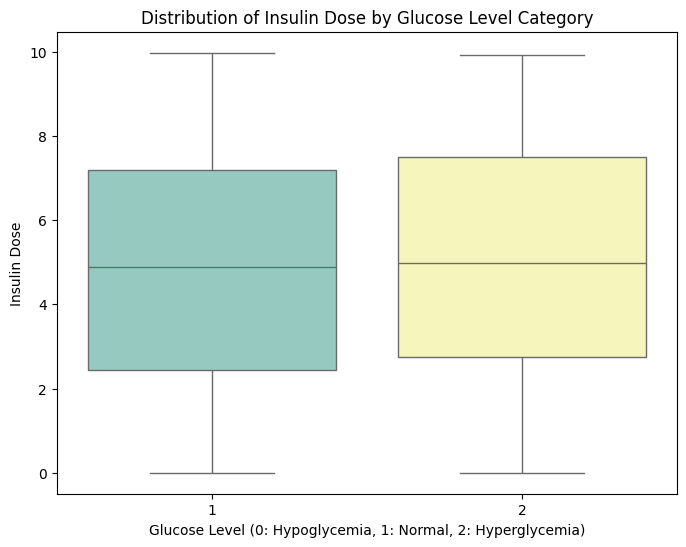

Data Analysis and Model Training Complete.


In [ ]:
# Correlation with target variable visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="glucose_level", y="pre_meal_glucose", palette="Set2")
plt.title("Distribution of Pre-Meal Glucose by Glucose Level Category")
plt.xlabel("Glucose Level (0: Hypoglycemia, 1: Normal, 2: Hyperglycemia)")
plt.ylabel("Pre-Meal Glucose")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="glucose_level", y="post_meal_glucose", palette="Set1")
plt.title("Distribution of Post-Meal Glucose by Glucose Level Category")
plt.xlabel("Glucose Level (0: Hypoglycemia, 1: Normal, 2: Hyperglycemia)")
plt.ylabel("Post-Meal Glucose")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="glucose_level", y="insulin_dose", palette="Set3")
plt.title("Distribution of Insulin Dose by Glucose Level Category")
plt.xlabel("Glucose Level (0: Hypoglycemia, 1: Normal, 2: Hyperglycemia)")
plt.ylabel("Insulin Dose")
plt.show()

print("Data Analysis and Model Training Complete.")

**KNN**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
X = df.drop(columns=['glucose_level'])  # Features
y = df['glucose_level']

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier()

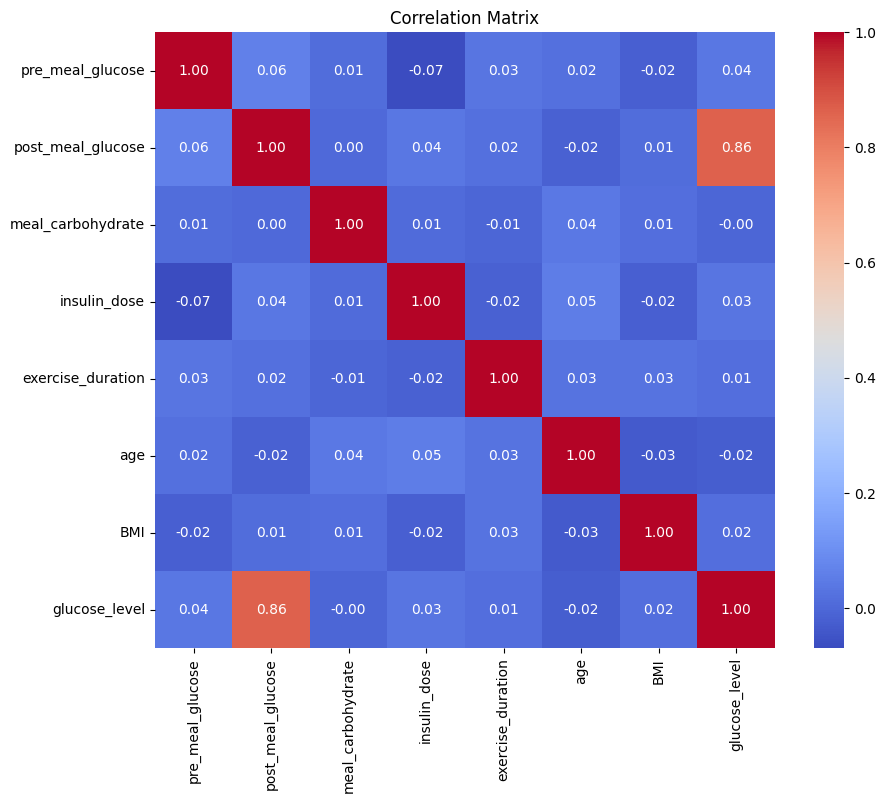

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Model Evaluation
y_pred = knn.predict(X_test)

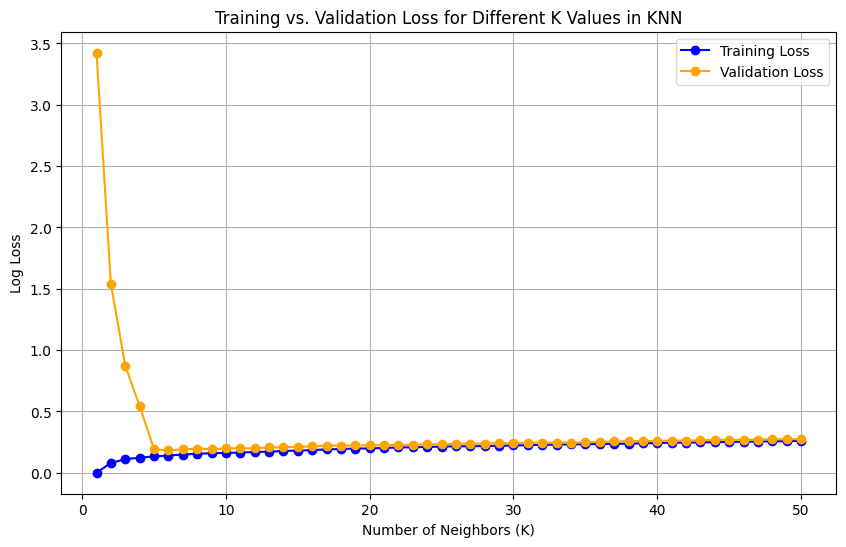

In [ ]:
# Import required libraries
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define a range of K values to simulate "epochs"
k_values = range(1, 51)  # Similar to epochs, here each "epoch" is a different K
train_losses = []
val_losses = []

# Loop over different K values and compute training/validation losses
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Calculate log loss on the training set
    train_prob = knn.predict_proba(X_train)
    train_loss = log_loss(y_train, train_prob)
    train_losses.append(train_loss)

    # Calculate log loss on the validation (test) set
    val_prob = knn.predict_proba(X_test)
    val_loss = log_loss(y_test, val_prob)
    val_losses.append(val_loss)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_losses, label="Training Loss", color='blue', marker='o')
plt.plot(k_values, val_losses, label="Validation Loss", color='orange', marker='o')
plt.title("Training vs. Validation Loss for Different K Values in KNN")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()


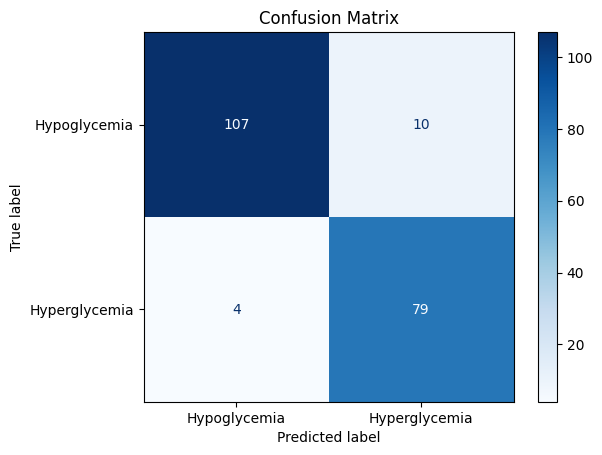

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Hypoglycemia', 'Hyperglycemia']).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Hypoglycemia', 'Hyperglycemia']))


Classification Report:
                precision    recall  f1-score   support

 Hypoglycemia       0.96      0.91      0.94       117
Hyperglycemia       0.89      0.95      0.92        83

     accuracy                           0.93       200
    macro avg       0.93      0.93      0.93       200
 weighted avg       0.93      0.93      0.93       200



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [ ]:
# Visualize training vs validation accuracy (using cross-validation accuracy for KNN)
from sklearn.model_selection import cross_val_score

# Compute cross-validation accuracy
cv_accuracies = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracies:", cv_accuracies)
print("Average Cross-Validation Accuracy:", np.mean(cv_accuracies))


Cross-Validation Accuracies: [0.925   0.94375 0.94375 0.91875 0.89375]
Average Cross-Validation Accuracy: 0.925
